In [2]:
import numpy as np
from openai import OpenAI
import os

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

def get_embedding(text):
    response = client.embeddings.create(
        model="text-embedding-ada-002",
        input=text
    )
    return np.array(response.data[0].embedding)

def calculate_difference_vector(left_concepts, right_concepts):
    # Get embeddings
    left_embeddings = [get_embedding(concept) for concept in left_concepts]
    right_embeddings = [get_embedding(concept) for concept in right_concepts]

    # Calculate difference vectors
    diff_vectors = [left - right for left, right in zip(left_embeddings, right_embeddings)]

    # Average the difference vectors
    leftism_vector = np.mean(diff_vectors, axis=0)

    # Normalize the vector
    leftism_vector = leftism_vector / np.linalg.norm(leftism_vector)

    return leftism_vector

# Define left and right concepts
left_concepts = ["leftist", "socialism", "communism"]
right_concepts = ["rightist", "conservatism", "capitalism"]

# Calculate the leftism vector
leftism_vector = calculate_difference_vector(left_concepts, right_concepts)

print("Leftism vector (first 10 dimensions):", leftism_vector[:10])


Leftism vector (first 10 dimensions): [-0.0196745  -0.00140803  0.01484143 -0.01635095  0.00066954 -0.05392641
  0.01875237 -0.02238998 -0.00512474 -0.00524951]


In [3]:
# Test cases
test_words = [
    "Marx", "Thatcher", "Obama", "Trump", "Sanders", "Reagan",
    "socialism", "capitalism", "libertarianism", "authoritarianism",
    "progressive", "conservative", "centrist", "moderate",
    "universal healthcare", "free market", "welfare state", "trickle-down economics",
    "trade union", "corporation", "equality", "hierarchy",
    "revolution", "tradition", "change", "status quo", "gender quotas", "meritocracy",
    "ban abortion", "legalize drugs", "gun control", "freedom of speech", "censorship",
]

In [4]:
# Function to calculate leftism score
def calculate_score(word, vector):
    word_embedding = get_embedding(word)
    return np.dot(word_embedding, vector)

In [11]:


# Calculate and print leftism scores
print("\nLeftism Scores:")
scores = [(word, calculate_score(word, leftism_vector)) for word in test_words]
scores.sort(key=lambda x: x[1], reverse=True)  # Sort by score in descending order

for word, score in scores:
    print(f"{word}: {score:.4f}")



Leftism Scores:
socialism: 0.2094
Marx: 0.1113
trade union: 0.0896
welfare state: 0.0822
universal healthcare: 0.0817
progressive: 0.0680
legalize drugs: 0.0571
Sanders: 0.0498
equality: 0.0456
gender quotas: 0.0415
freedom of speech: 0.0352
trickle-down economics: 0.0351
hierarchy: 0.0297
change: 0.0278
Obama: 0.0259
revolution: 0.0212
censorship: 0.0182
corporation: 0.0181
free market: 0.0136
Thatcher: 0.0125
libertarianism: 0.0117
meritocracy: 0.0104
moderate: 0.0041
ban abortion: -0.0026
centrist: -0.0033
status quo: -0.0070
Reagan: -0.0113
gun control: -0.0232
tradition: -0.0409
Trump: -0.0410
authoritarianism: -0.0472
capitalism: -0.0555
conservative: -0.1330


In [ ]:
# Function to find nearest words
def find_nearest_words(embedding, word_list, n=5):
    word_embeddings = [get_embedding(word) for word in word_list]
    distances = [np.linalg.norm(embedding - we) for we in word_embeddings]
    nearest_indices = np.argsort(distances)[:n]
    return [word_list[i] for i in nearest_indices]

# Test moving along the leftism vector
print("\nMoving along the leftism vector:")
center_word = "moderate"
center_embedding = get_embedding(center_word)

left_embedding = center_embedding + leftism_vector
right_embedding = center_embedding - leftism_vector

print(f"Starting from '{center_word}':")
print("Nearest words when moving left:", find_nearest_words(left_embedding, test_words))
print("Nearest words when moving right:", find_nearest_words(right_embedding, test_words))

In [2]:
calculate_score("gender quotas")
calculate_score("moderate")

np.float64(-0.02076949423802452)

In [5]:
authoritarian_concepts = [
    "Centralized power",
    "State control of media",
    "Restricted civil liberties",
    "Surveillance of citizens",
    "Censorship"
]

libertarian_concepts = [
    "Individual liberty",
    "Minimal government",
    "Free markets",
    "Personal responsibility",
    "Non-interventionist foreign policy"
]


In [6]:
libertarian_vector = calculate_difference_vector(libertarian_concepts, authoritarian_concepts)

In [7]:
#print scores for libertarian_vector with test words
print("\nLibertarian Scores:")
scores = [(word, calculate_score(word, libertarian_vector)) for word in test_words]
scores.sort(key=lambda x: x[1], reverse=True)  # Sort by score in descending order

for word, score in scores:
    print(f"{word}: {score:.4f}")


Libertarian Scores:
free market: 0.1817
libertarianism: 0.1243
capitalism: 0.0615
universal healthcare: 0.0505
trickle-down economics: 0.0490
progressive: 0.0414
Reagan: 0.0406
equality: 0.0396
Obama: 0.0375
conservative: 0.0371
moderate: 0.0368
Marx: 0.0273
tradition: 0.0272
Sanders: 0.0270
trade union: 0.0262
meritocracy: 0.0248
Trump: 0.0223
centrist: 0.0215
socialism: 0.0206
freedom of speech: 0.0175
revolution: 0.0174
welfare state: 0.0121
Thatcher: 0.0073
status quo: 0.0036
ban abortion: 0.0028
gender quotas: 0.0019
change: -0.0034
corporation: -0.0071
gun control: -0.0091
legalize drugs: -0.0092
hierarchy: -0.0290
authoritarianism: -0.0371
censorship: -0.1838


In [8]:
# Plot test words on a 2D plane with axis defined by the leftism and libertarian vectors
import matplotlib.pyplot as plt

test_words.append("Parti Communiste Français")

# Get embeddings
word_embeddings = [get_embedding(word) for word in test_words]

In [10]:
new_words = ["Test"]
new_words_embeddings = [get_embedding(word) for word in new_words]
word_embeddings.extend(new_words_embeddings)
test_words.extend(new_words)

# Project embeddings onto the leftism and libertarian vectors
leftism_scores = [np.dot(we, leftism_vector) for we in word_embeddings]
libertarian_scores = [np.dot(we, libertarian_vector) for we in word_embeddings]

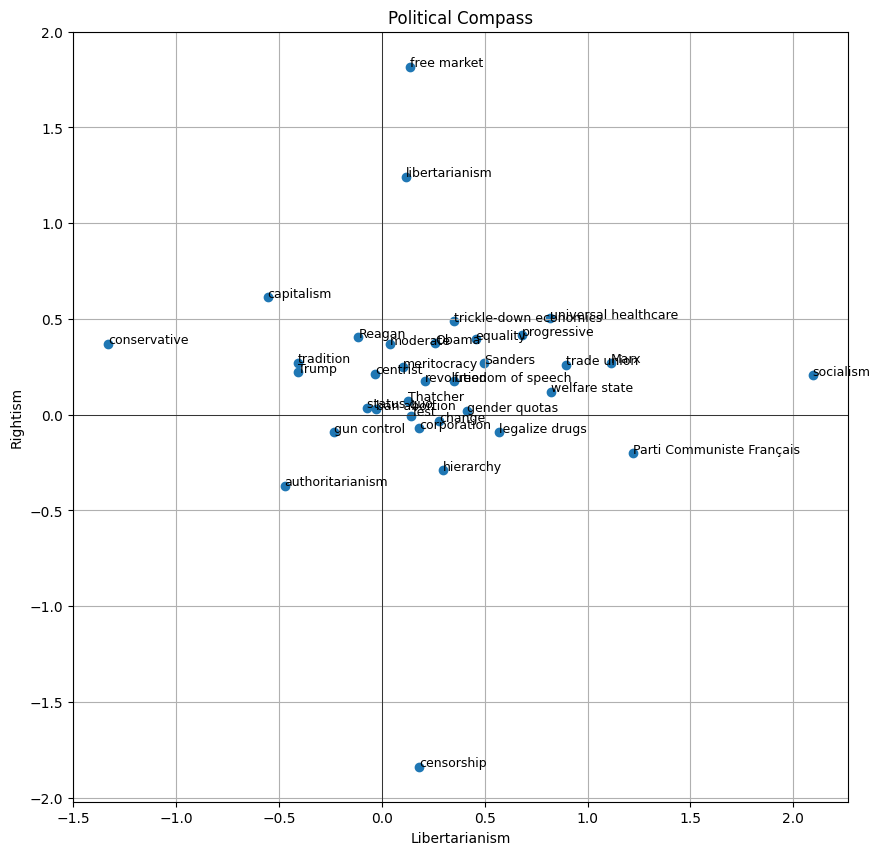

In [19]:
lf_scores = [x * 10 for x in leftism_scores]
lb_scores = [x * 10 for x in libertarian_scores]

# Plot as political compass
plt.figure(figsize=(10, 10))
plt.scatter(lf_scores, lb_scores)
for i, word in enumerate(test_words):
    plt.text(lf_scores[i], lb_scores[i], word, fontsize=9)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.xlabel("Libertarianism")
plt.ylabel("Rightism")
plt.title("Political Compass")
plt.grid(True)
plt.show()

In [9]:
test_words

['Marx',
 'Thatcher',
 'Obama',
 'Trump',
 'Sanders',
 'Reagan',
 'socialism',
 'capitalism',
 'libertarianism',
 'authoritarianism',
 'progressive',
 'conservative',
 'centrist',
 'moderate',
 'universal healthcare',
 'free market',
 'welfare state',
 'trickle-down economics',
 'trade union',
 'corporation',
 'equality',
 'hierarchy',
 'revolution',
 'tradition',
 'change',
 'status quo',
 'gender quotas',
 'meritocracy',
 'ban abortion',
 'legalize drugs',
 'gun control',
 'freedom of speech',
 'censorship',
 'Parti Communiste Français']

In [14]:
communist_manifesto = """Class struggle: The idea that history is driven by conflicts between different social classes.
Capitalism and exploitation: A critique of the capitalist system and how it leads to the exploitation of workers.
Abolition of private property: The call for collective ownership of the means of production.
Revolution: The belief that a proletarian revolution is necessary to overthrow the bourgeois ruling class.
Stages of communism: The proposed transition from capitalism through socialism to a classless communist society.
Internationalism: The idea that workers of all countries should unite in their common interests."""

# Cm in relation to leftism and libertarian vectors
print("Communist Manifesto:")
print("Leftism score:", calculate_score(communist_manifesto, leftism_vector))
print("Libertarian score:", calculate_score(communist_manifesto, libertarian_vector))

Communist Manifesto:
Leftism score: 0.13481068353761816
Libertarian score: 0.010995019298123694


In [16]:
test = [0.1]
test * 10
test

[0.1]